In [ ]:
#importando as bibilotecas que iremos usa-las
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np

In [ ]:
#lendo a base de dados
digitos = datasets.load_digits()

In [ ]:
#vendo a descrição das informações dos dados
print(digitos.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
#exibindo os dados 
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [ ]:
digitos.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#usando o metodo zip() pra retornar uma sequencia de duplas de images e de target
imagens_e_labels = list(zip(digitos.images, digitos.target))

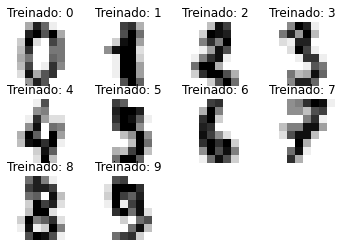

In [ ]:
#criando um 'FOR' para mostrar a imagem junto com as label de 1 a 10
for index, (imagem, label) in enumerate(imagens_e_labels[ :10 ]):
      plt.subplot(3 ,4, index + 1)
      plt.axis('Off')
      plt.imshow(imagem, cmap=plt.cm.gray_r, interpolation='nearest')
      plt.title('Treinado: %i' %label)

In [ ]:
#mostrando o tamanho dos imagens de digitos
n_samples = len(digitos.images)
n_samples

1797

In [ ]:
#transformando o imagns digitos numa linha so
data = digitos.images.reshape(n_samples, -1)
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
#mostrando uma determinada classe do digitos target
classe = digitos.target
classe

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
#convertendo o data em um dataframa
dataset = pd.DataFrame(data)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
dataset['classe'] = classe

In [ ]:
#importando as bibliotecas train_test_split
from sklearn.model_selection import train_test_split

#dividindo os dados em treino e test
x_train, x_test, y_train, y_test = train_test_split(dataset.drop('classe',axis=1), dataset['classe'],test_size=0.3)

In [ ]:
#verificando dos dados de treinos e de testes
x_train.shape, x_test.shape

((1257, 64), (540, 64))

In [ ]:
#imprimindo os dados de x_train
#essa escolha é aleatoria. Para ver essa aleatoriaedade, basta execultar 
#a linha de comando train_test_split. E depois execultar esta celular print(x_train)
#oberve que os valores irão mudar
print(x_train)

       0    1     2     3     4     5   ...    58    59    60    61    62    63
1194  0.0  0.0   6.0  12.0  14.0   4.0  ...   7.0  13.0  12.0   4.0   0.0   0.0
278   0.0  1.0  13.0  16.0  16.0   4.0  ...  10.0  14.0  16.0  16.0  16.0   0.0
1301  0.0  0.0   0.0   2.0  14.0   1.0  ...   3.0   2.0  16.0   6.0   0.0   0.0
899   0.0  0.0   6.0  14.0  16.0   5.0  ...   3.0  14.0  16.0   6.0   0.0   0.0
1371  0.0  0.0   7.0  16.0  12.0   0.0  ...   6.0  13.0  12.0  12.0  15.0  12.0
...   ...  ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
1366  0.0  0.0   4.0  15.0  13.0   2.0  ...   2.0  14.0  16.0  10.0   0.0   0.0
549   0.0  0.0   9.0   8.0  12.0  13.0  ...  10.0  14.0  15.0   5.0   0.0   0.0
1405  0.0  0.0   2.0  13.0  16.0   8.0  ...   2.0  14.0   0.0   0.0   0.0   0.0
1596  0.0  0.0   7.0  15.0  15.0   6.0  ...   5.0  15.0  15.0   2.0   0.0   0.0
831   0.0  0.0   7.0  15.0  14.0   8.0  ...   8.0  15.0  15.0   2.0   0.0   0.0

[1257 rows x 64 columns]


In [ ]:
print(x_test)

       0    1     2     3     4     5   ...    58    59    60    61   62   63
1457  0.0  0.0   0.0   0.0   7.0  16.0  ...   0.0   0.0   9.0  16.0  6.0  0.0
646   0.0  0.0   7.0  16.0  15.0   4.0  ...  10.0  16.0  14.0   4.0  0.0  0.0
1622  0.0  0.0   7.0  14.0  16.0   5.0  ...  12.0   5.0   0.0   0.0  0.0  0.0
819   0.0  0.0  13.0  16.0  15.0   2.0  ...  15.0   7.0   0.0   0.0  0.0  0.0
895   0.0  0.0   2.0  10.0  13.0  12.0  ...   2.0  12.0  16.0  14.0  0.0  0.0
...   ...  ...   ...   ...   ...   ...  ...   ...   ...   ...   ...  ...  ...
44    0.0  0.0   9.0  16.0  16.0  16.0  ...  13.0  10.0   0.0   0.0  0.0  0.0
1128  0.0  0.0   5.0  15.0  12.0   1.0  ...   5.0  15.0  11.0   4.0  0.0  0.0
622   0.0  0.0   0.0  11.0  16.0  10.0  ...   1.0  11.0  16.0  16.0  1.0  0.0
1411  0.0  0.0   0.0   5.0  15.0   3.0  ...   0.0   6.0  15.0   2.0  0.0  0.0
1076  0.0  0.0   2.0  16.0  10.0   0.0  ...   1.0  12.0  16.0   3.0  0.0  0.0

[540 rows x 64 columns]


In [ ]:
print(y_train)

1194    9
278     2
1301    4
899     8
1371    2
       ..
1366    0
549     5
1405    7
1596    8
831     0
Name: classe, Length: 1257, dtype: int64


In [ ]:
print(y_test)

1457    1
646     0
1622    7
819     7
895     9
       ..
44      7
1128    0
622     6
1411    4
1076    1
Name: classe, Length: 540, dtype: int64


In [ ]:
#importando a biblioteca
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#instanciando o KNN
knn = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
#treinando o modelo
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#predizendo os valores
resultado = knn.predict(x_test)

In [ ]:
#imprimindo os valores de resultados
print(resultado)

[1 0 7 7 9 3 4 0 6 7 9 7 0 9 1 9 8 5 2 3 6 5 7 8 2 0 9 0 0 1 4 4 5 0 1 4 1
 0 8 2 4 2 5 5 4 8 9 2 5 8 1 2 3 2 2 7 5 9 2 4 4 5 7 2 4 7 4 4 6 4 6 9 9 8
 3 5 8 1 7 5 2 2 3 2 2 2 4 0 5 0 1 0 8 9 5 4 3 9 9 7 7 0 0 6 1 0 0 8 3 3 9
 3 1 9 9 5 8 3 9 9 9 4 1 6 0 0 7 3 3 9 9 4 5 3 3 5 1 7 4 9 0 7 3 1 6 8 6 3
 1 6 3 0 4 3 7 7 7 8 4 5 9 1 3 3 1 0 7 9 8 5 3 1 6 0 4 2 3 4 4 1 8 2 8 2 2
 1 1 0 2 9 4 1 0 1 8 3 3 7 9 0 1 6 1 9 0 0 1 5 3 8 5 1 6 5 3 1 6 4 6 8 1 4
 8 5 9 9 4 0 2 5 2 0 8 7 1 9 2 9 9 3 2 1 3 1 9 6 9 4 3 3 2 7 1 4 3 1 7 3 7
 5 0 0 3 4 2 4 9 6 3 1 1 5 6 4 7 0 3 6 4 4 5 2 4 8 7 7 9 0 5 6 2 1 8 6 1 9
 2 3 6 1 7 5 6 3 1 2 1 4 7 7 6 7 2 5 5 0 7 3 9 2 2 5 1 5 2 6 3 3 7 1 2 1 7
 2 7 9 6 0 6 7 7 9 8 8 3 8 9 1 3 4 9 8 4 1 1 5 4 7 3 7 5 0 4 1 1 6 3 6 9 2
 4 7 6 1 6 2 9 7 4 8 7 8 5 2 4 1 9 5 9 5 7 6 5 1 0 2 3 3 6 6 6 4 0 6 1 3 7
 6 9 8 8 3 8 5 2 3 7 7 4 5 4 0 0 7 2 5 8 2 5 3 4 5 0 2 5 0 6 9 9 7 4 2 8 6
 0 5 6 2 1 6 0 3 4 4 3 2 6 9 8 0 8 3 2 2 4 5 5 6 9 6 2 7 1 0 1 1 3 8 2 0 7
 4 2 5 0 8 9 8 0 4 1 8 5 

In [ ]:
#Tecnicas de Validação

In [ ]:
#usando metrica de classificação
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      0.98      0.99        63
           2       1.00      1.00      1.00        53
           3       0.95      0.98      0.96        56
           4       1.00      0.98      0.99        59
           5       0.98      0.98      0.98        51
           6       0.98      1.00      0.99        52
           7       0.98      1.00      0.99        56
           8       1.00      1.00      1.00        40
           9       0.98      0.95      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [ ]:
#utilizando a matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['          Predito'], margins=True))

          Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                          
0                  51   0   0   0   0   0   0   0   0   0   51
1                   0  62   0   0   0   1   0   0   0   0   63
2                   0   0  53   0   0   0   0   0   0   0   53
3                   0   0   0  55   0   0   0   1   0   0   56
4                   0   0   0   0  58   0   0   0   0   1   59
5                   0   0   0   0   0  50   1   0   0   0   51
6                   0   0   0   0   0   0  52   0   0   0   52
7                   0   0   0   0   0   0   0  56   0   0   56
8                   0   0   0   0   0   0   0   0  40   0   40
9                   0   0   0   3   0   0   0   0   0  56   59
All                51  62  53  58  58  51  53  57  40  57  540


In [100]:
#usando o cross validation
from sklearn.model_selection import cross_val_score

In [101]:
score = cross_val_score(
                        knn, 
                        dataset.drop('classe', axis=1), 
                        dataset['classe'], 
                        cv=5
                        )

In [102]:
score

array([0.95555556, 0.95833333, 0.96657382, 0.98328691, 0.96657382])